In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import leastsq
from scipy import ndimage
from func import *

In [2]:
def algorithm_script(obj,z,prefix_path_cube="/home/mainak/ftp.hidrive.strato.com/users/login-carsftp/IFU_data",destination_path_cube="/home/mainak/Downloads/Outflow_paper1/PMAS"):
    print ('%s'%(obj))
    (orig_cube,orig_err,orig_wave,orig_header) = loadCube('%s/PMAS_O3Ha/%s/%s.rscube.fits'%(prefix_path_cube,obj,obj))   
    (cont_cube,cont_err,cont_wave,cont_header) = loadCube('%s/PMAS_O3Ha/%s/fitting/full/%s.cont_model.fits'%(prefix_path_cube,obj,obj))
    (QSO_cube,QSO_err,QSO_wave,QSO_header) = loadCube('%s/PMAS_O3Ha/%s/%s.QSO_full.fits'%(prefix_path_cube,obj,obj))
    difference = difference_in_wavelength_dimension(orig_cube,cont_cube)
    (wo_cube,wo_err,wo_wave,wo_header) = create_wo_absorption_cube(obj,orig_cube,orig_err,orig_header,cont_cube,cont_wave,difference)
    store_cube('%s/%s/%s.wo_absorption.fits'%(destination_path_cube,obj,obj),wo_cube,wo_wave,wo_err,wo_header)

In [3]:
z = {"HE0853-0126":0.05981,"HE0949-0122":0.01993}

objs = z.keys()

for obj in objs:
     algorithm_script(obj,z[obj]) 

HE0853-0126
HE0949-0122


In [29]:
hdu = fits.open('/home/mainak/Downloads/Outflow_paper1/PMAS/HE0853-0126/HE0853-0126.wo_absorption.fits')
cube = hdu[0].data
err = hdu[1].data
header = hdu[0].header
try:
    err = hdu[1].data
except IndexError:
    err = 0
wavestart = header['CRVAL3']
try:
    wavint = header['CD3_3']
except KeyError:
    wavint = header['CDELT3']  
wave = wavestart+np.arange(cube.shape[0])*wavint
z = 0.05981
(x0,y0) = (8,7)
hdu.close()

In [56]:
k = 1+z
select = ((wave>4750*k) & (wave<5090*k)) ^ ((wave>4775*k) & (wave<4783*k))

In [57]:
spec = cube[:,y0,x0][select]
spec_err = err[:,y0,x0][select]

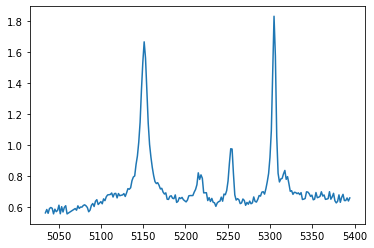

In [59]:
plt.plot(wave[select],spec)
plt.show()

In [ ]:
select = 